#Импорт библиотек ❤
=


In [1]:
!pip  install catboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.1 MB/s eta 0:00:00


#Первичный анализ


In [2]:
df = pd.read_csv('train.csv')
df.head()# загружаем данные и смотрим  первые  пять записей  и  делаем  первые  выводы о данных

<ipython-input-2-2a8aa71e6a1a>:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1649,1650,1

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


In [3]:
df.shape #сразу смотрим сколько строк и клонок

(14456, 2666)

In [4]:
df.describe() #стата по колонкам

,client_id,target,col1,col2,col3,col4,col5,col6,col7,col8,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
count,14456.000000,14456.000000,3.000000,6.000000,12.000000,19.000000,1.0,1.0,3.000000e+00,8.000000e+00,...,6.207000e+03,6.207000e+03,6.207000e+03,5.060000e+02,5.060000e+02,5.060000e+02,8.036000e+03,8.036000e+03,8.036000e+03,14456.000000
mean,2853.066270,0.030160,0.333333,0.500000,0.306548,0.346140,7464071.0,7464071.0,4.762016e+06,4.127563e+06,...,6.951439e+06,6.843002e+06,6.896837e+06,7.042210e+06,7.025990e+06,7.034100e+06,6.934524e+06,6.806725e+06,6.869273e+06,0.258330
std,1957.002315,0.171035,0.577350,0.547723,0.460514,0.452933,NaN,NaN,2.395190e+06,1.430218e+06,...,4.539805e+06,4.509677e+06,4.509058e+06,5.162596e+06,5.160387e+06,5.160985e+06,4.354458e+06,4.315602e+06,4.314412e+06,0.006802
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7464071.0,7464071.0,2.900000e+06,2.900000e+06,...,3.000000e+05,1.000000e+05,3.000000e+05,4.692700e+05,4.692700e+05,4.692700e+05,3.000000e+05,1.000000e+05,3.000000e+05,0.230229
25%,1186.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7464071.0,7464071.0,3.410988e+06,3.666482e+06,...,4.316300e+06,4.248000e+06,4.300000e+06,4.413816e+06,4.413816e+06,4.413816e+06,4.334639e+06,4.276000e+06,4.303000e+06,0.256261
50%,2568.000000,0.000000,0.000000,0.500000,0.000000,0.000000,7464071.0,7464071.0,3.921976e+06,3.921976e+06,...,6.240000e+06,6.164000e+06,6.224000e+06,6.322850e+06,6.322850e+06,6.322850e+06,6.244578e+06,6.146774e+06,6.225550e+06,0.256261
75%,4258.250000,0.000000,0.500000,1.000000,0.758929,0.839286,7464071.0,7464071.0,5.693024e+06,3.958614e+06,...,8.801262e+06,8.649254e+06,8.748625e+06,9.110361e+06,9.110361e+06,9.110361e+06,8.769750e+06,8.619750e+06,8.700000e+06,0.257217
max,8302.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7464071.0,7464071.0,7.464071e+06,7.464071e+06,...,9.800000e+07,9.800000e+07,9.800000e+07,9.524250e+07,9.524250e+07,9.524250e+07,9.800000e+07,9.800000e+07,9.800000e+07,0.339800


In [5]:
df['target'].value_counts() # дисбаланс в целевой переменной

,count
target,
0,14020
1,436


In [6]:
def drop_columns_with_many_na(dataframe, threshold=0.455):
    na_counts = dataframe.isna().sum()

    # Удаляем столбцы, в которых количество пропусков больше 45%
    dropped_columns = [column for column in na_counts.index if na_counts[column] > threshold * len(dataframe)]
    return dataframe.drop(dropped_columns, axis=1)

# Применяем функцию к нашему DataFrame
df = drop_columns_with_many_na(df)

<Axes: >

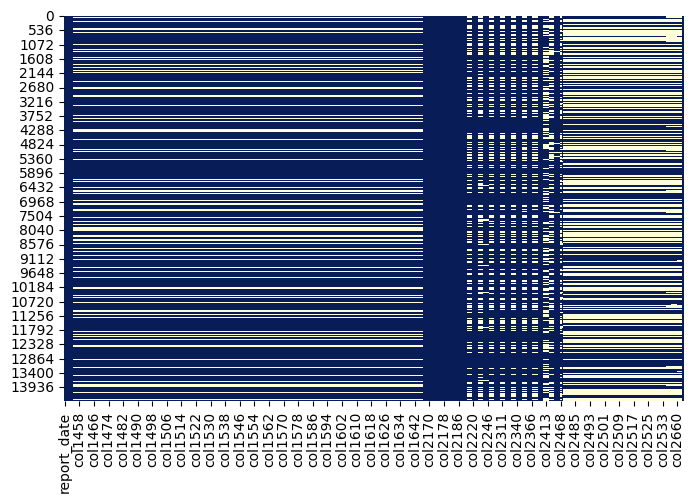

In [7]:
plt.figure(figsize = (8,5)) #пропуски
sns.heatmap(df.isnull(),cmap="YlGnBu_r",cbar=False)

In [8]:
df.shape # осталось 340 колонок после чистки

(14456, 340)

In [9]:
df.select_dtypes(include=['object']) # смотрим  на категориальные  колонки

,report_date,col1454
0,2022-11-01,00f3d719-a6ec-4960-ba01-8372eb705443
1,2022-11-01,01febac0-b083-494e-8589-f98400074b94
2,2022-05-01,0278175e-c0bb-4e1e-bfe5-20db6811d3e2
3,2022-09-01,0364571d-5325-ed11-b823-005056b825cd
4,2022-08-01,065957a6-9b2a-435a-b561-024e9e8d9ad7
...,...,...
14451,2022-07-01,fc4b5aa0-c4d6-4394-93db-57a1505e66c4
14452,2022-09-01,fcc827d8-b64b-4b59-b718-87f2a51d77a4
14453,2022-02-01,fd5f22f5-36f6-4dca-9896-8c9e90bbb702
14454,2021-08-01,fdf04fb7-5404-4a9c-ae5b-e1e893060631


In [10]:
# # Получаем список категориальных столбцов (типа object)
# cat_columns = df.select_dtypes('object').columns

# # Получаем список числовых столбцов (типа float)
# numeric_columns = df.select_dtypes(include=['float']).columns

# # Удаляем дубликаты, исключая столбцы 'report_date' и 'target'
# df = df.drop_duplicates(subset=list(set(df.columns) - set(['report_date', 'target'])))

# # Заполняем пропущенные значения в категориальных столбцах значением "unknown"
# for cat_col in cat_columns:
#     df[cat_col] = df[cat_col].fillna("unknown")

# # Заполняем пропущенные значения в числовых столбцах средним значением
# for num_col in numeric_columns:
#     mean_value = df[num_col].mean()
#     df[num_col] = df[num_col].fillna(int(mean_value))

# # Заполняем оставшиеся пропущенные значения в столбцах нулями
# df = df.apply(lambda x: x.fillna(0))



In [11]:
cat_columns = df.select_dtypes('object').columns
numeric_columns = df.select_dtypes(include=['float']).columns
df = df.drop_duplicates(subset=list(set(df.columns) - set(['report_date', 'target'])))

# Заполняем пропущенные значения в категориальных переменных
for cat_col in cat_columns:
    df[cat_col] = df[cat_col].fillna("unknown")

# Заполняем пропущенные значения в числовых переменных
for num_col in numeric_columns:
    mean_value = df[num_col].mean()
    df[num_col] = df[num_col].fillna(int(mean_value))

df = df.apply(lambda x:x.fillna(0))

<ipython-input-11-d6d91d39a5f2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_col] = df[cat_col].fillna("unknown")
<ipython-input-11-d6d91d39a5f2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_col] = df[num_col].fillna(int(mean_value))


In [12]:
df.shape #проверка

(14320, 340)

In [13]:
# Фильтруем данные для клиента с client_id = 51
df_cl = df[df['client_id'] == 51]

# Колонка col1454 выполняет функцию идентификатора пользователя (аналогично user_id).
# Поскольку она дублирует функциональность client_id, удаляем её, чтобы избежать избыточности
df_cl = df_cl.drop(columns=['col1454'])


In [14]:
df_cl # у  одного  клиента  в разные  даты  могут быть разные  значения  таргет  колонки поэтому выкидывать дату нельзя

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2564,col2565,col2566,col2588,col2589,col2590,col2660,col2661,col2662,col2663
39,2022-08-01,51,1,0,0.0,0.0,1.0,1.0,1.0,2.0,...,6412289.0,6298885.0,6354174.0,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.257217
1482,2022-04-01,51,0,0,0.0,0.0,0.0,1.0,1.0,1.0,...,6412289.0,6298885.0,6354174.0,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.257217
1779,2022-09-01,51,1,0,0.0,0.0,0.0,1.0,1.0,2.0,...,6412289.0,6298885.0,6354174.0,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.257217
2676,2022-03-01,51,0,0,0.0,0.0,1.0,1.0,1.0,1.0,...,6412289.0,6298885.0,6354174.0,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.257217
6191,2021-12-01,51,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,6412289.0,6298885.0,6354174.0,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.257217
12729,2022-10-01,51,1,0,0.0,0.0,0.0,1.0,1.0,2.0,...,6412289.0,6298885.0,6354174.0,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.257217


In [15]:
df.drop('col1454' , axis = 1 , inplace = True)

In [16]:
def most_frequent_in_each_column(df):
    # Создаем новый df где в каждой колонке будет самое часто встречающееся значение
    frequent_values = df.apply(pd.Series.mode)

    # Если в колонке есть несколько наиболее часто встречающихся значений, выбираем первое
    frequent_values.replace(to_replace=pd.NA, value=None, inplace=True)

    # Выводим результат
    return frequent_values
result = most_frequent_in_each_column(df)
result

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2564,col2565,col2566,col2588,col2589,col2590,col2660,col2661,col2662,col2663
0,2023-01-01,50,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,6412289.0,6298885.0,6354174.0,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.256261


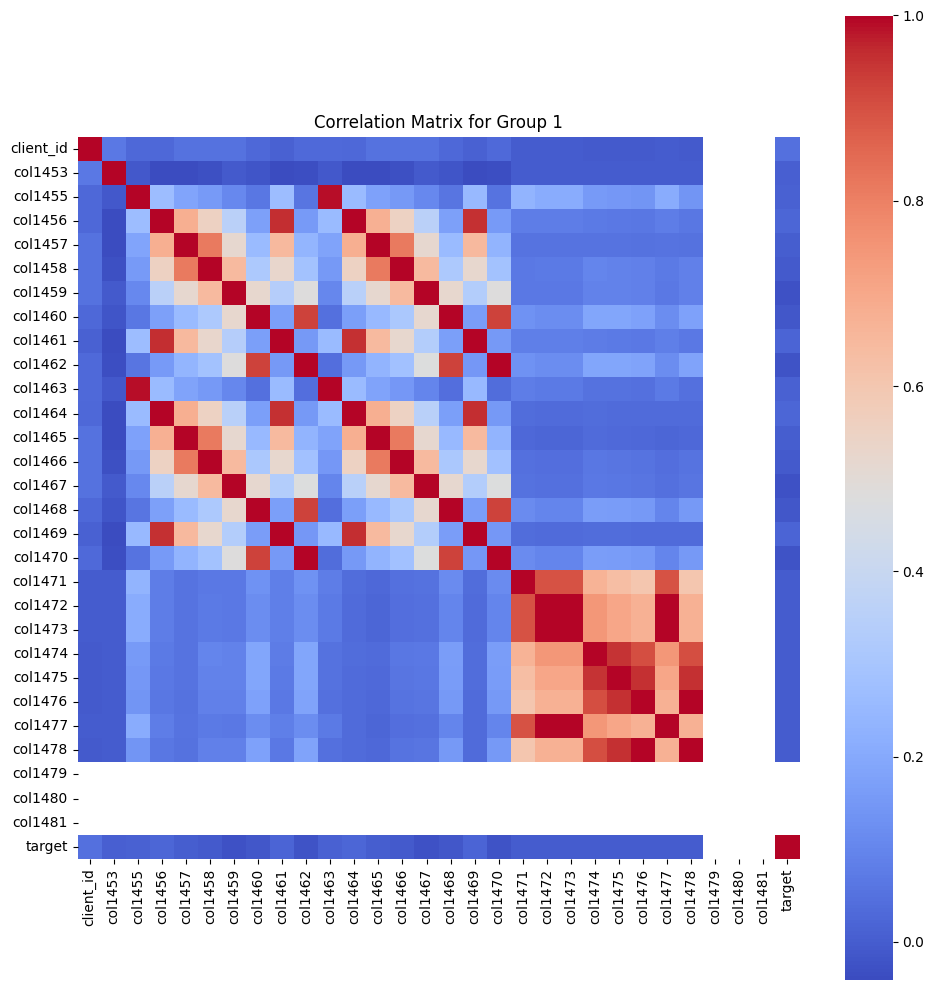

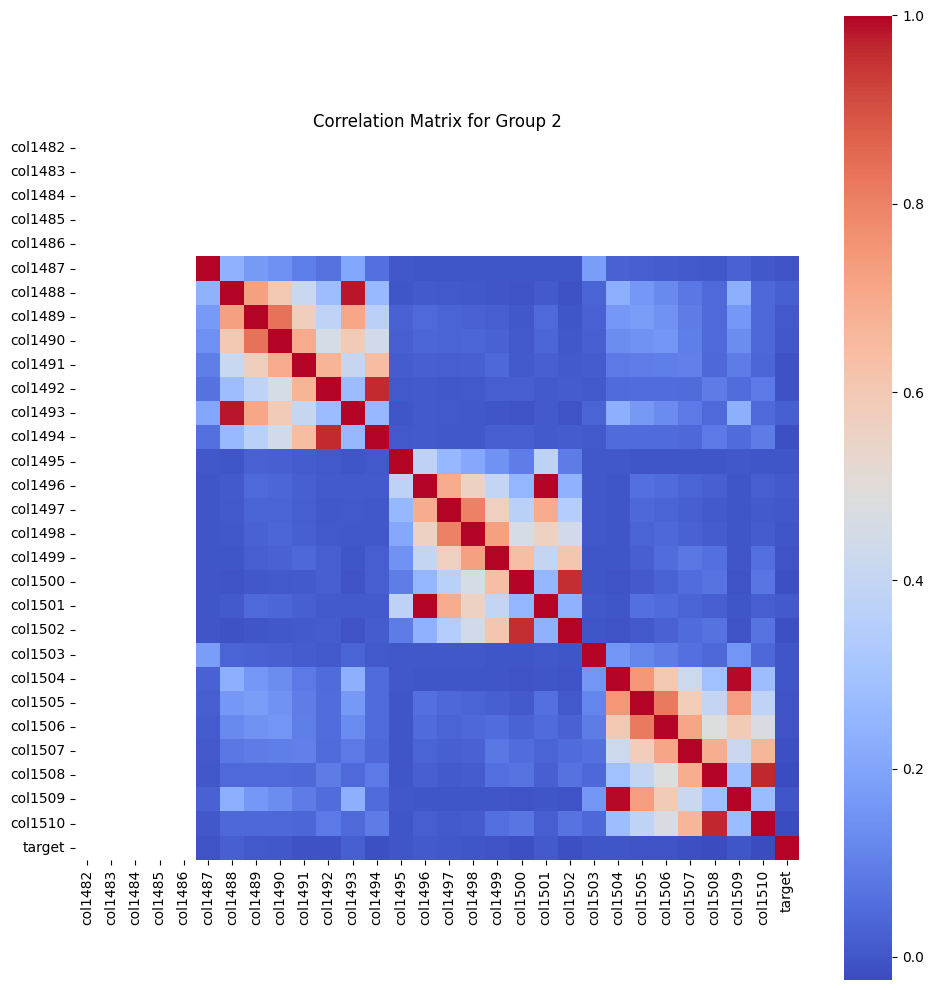

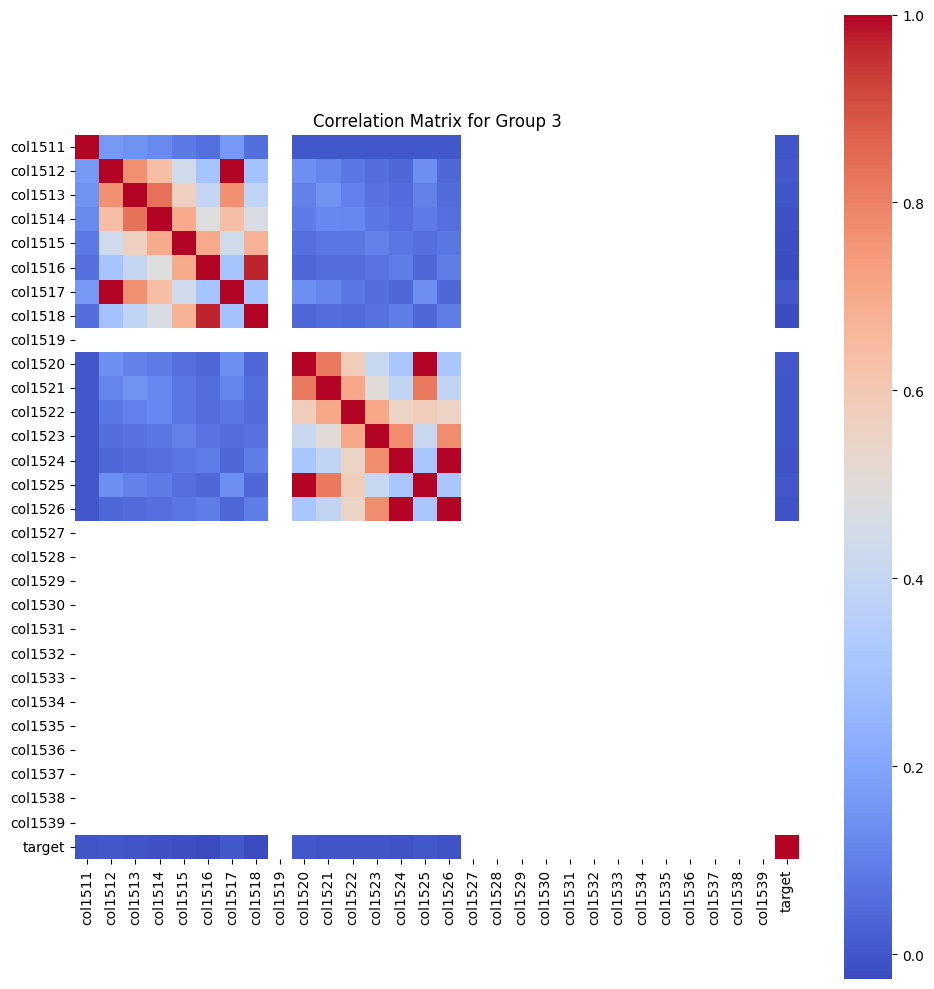

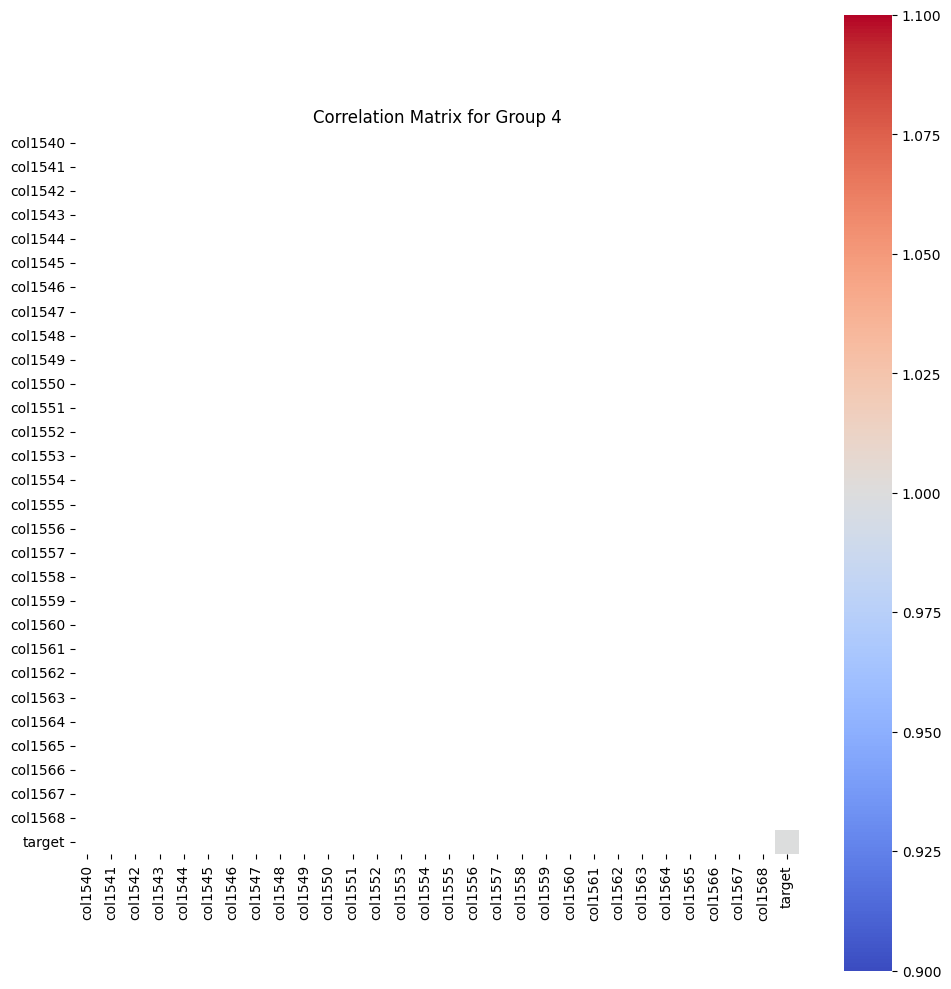

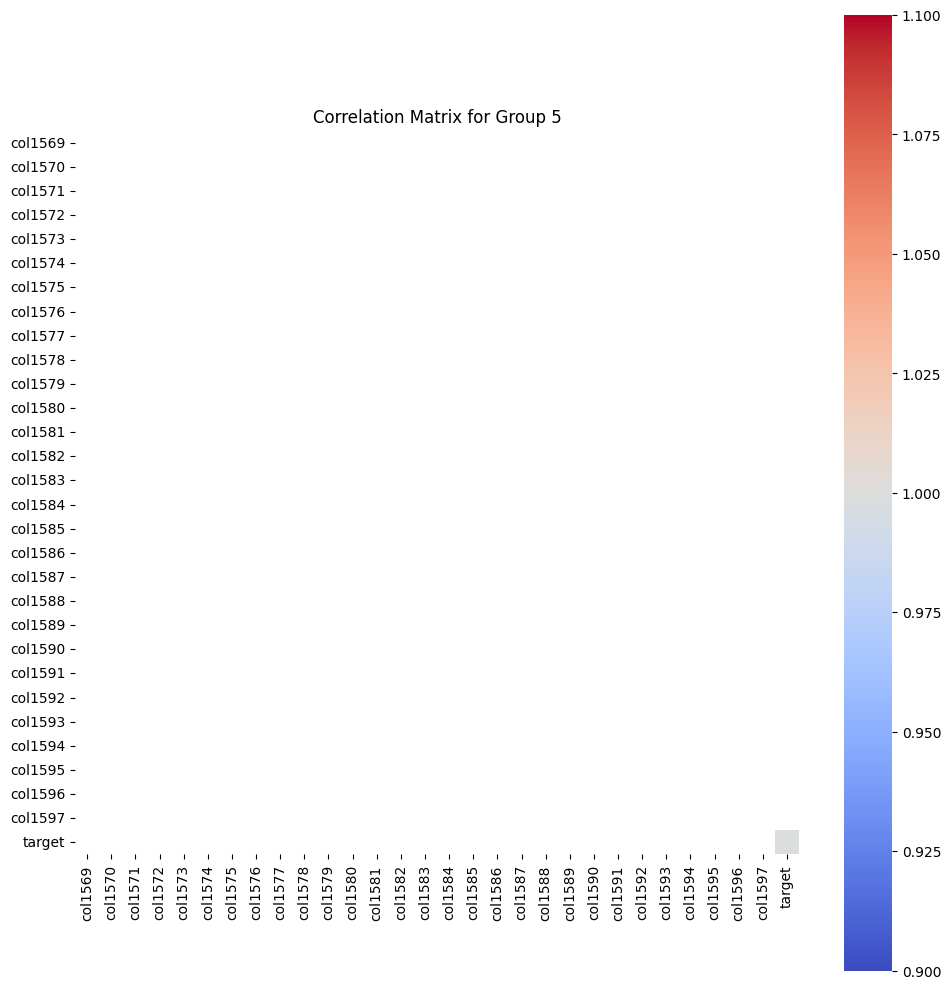

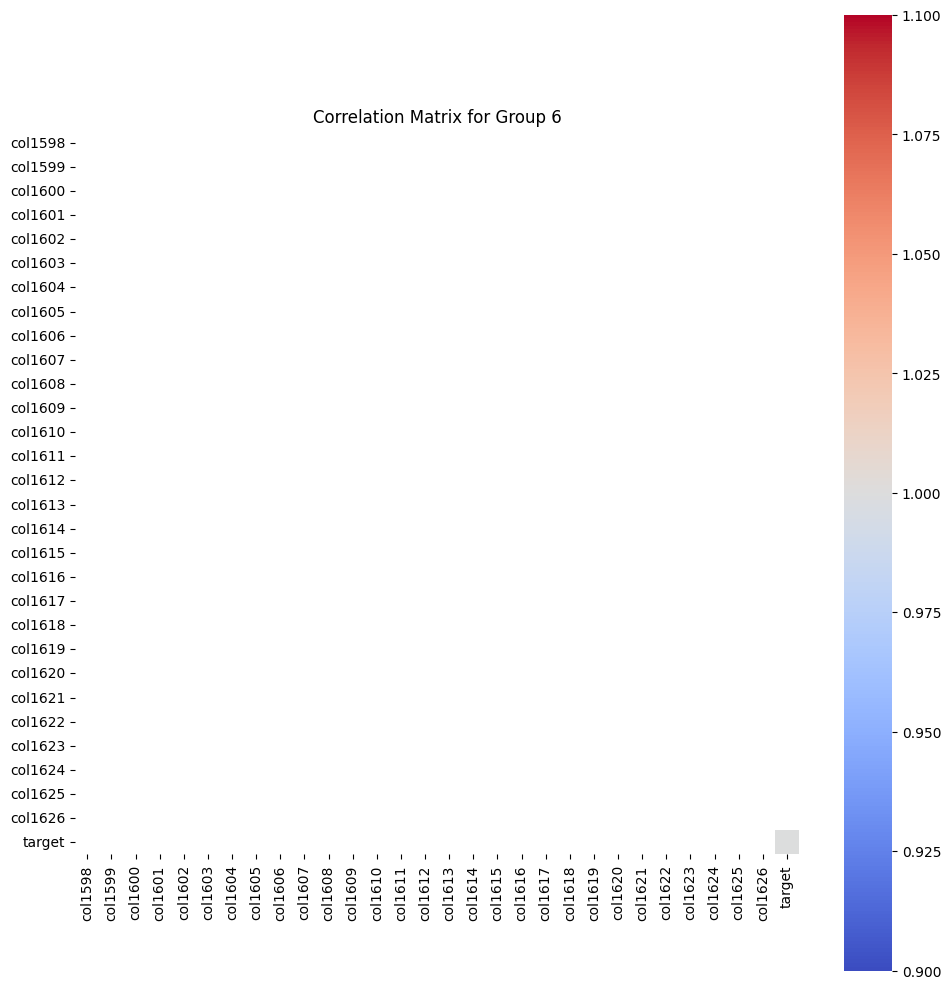

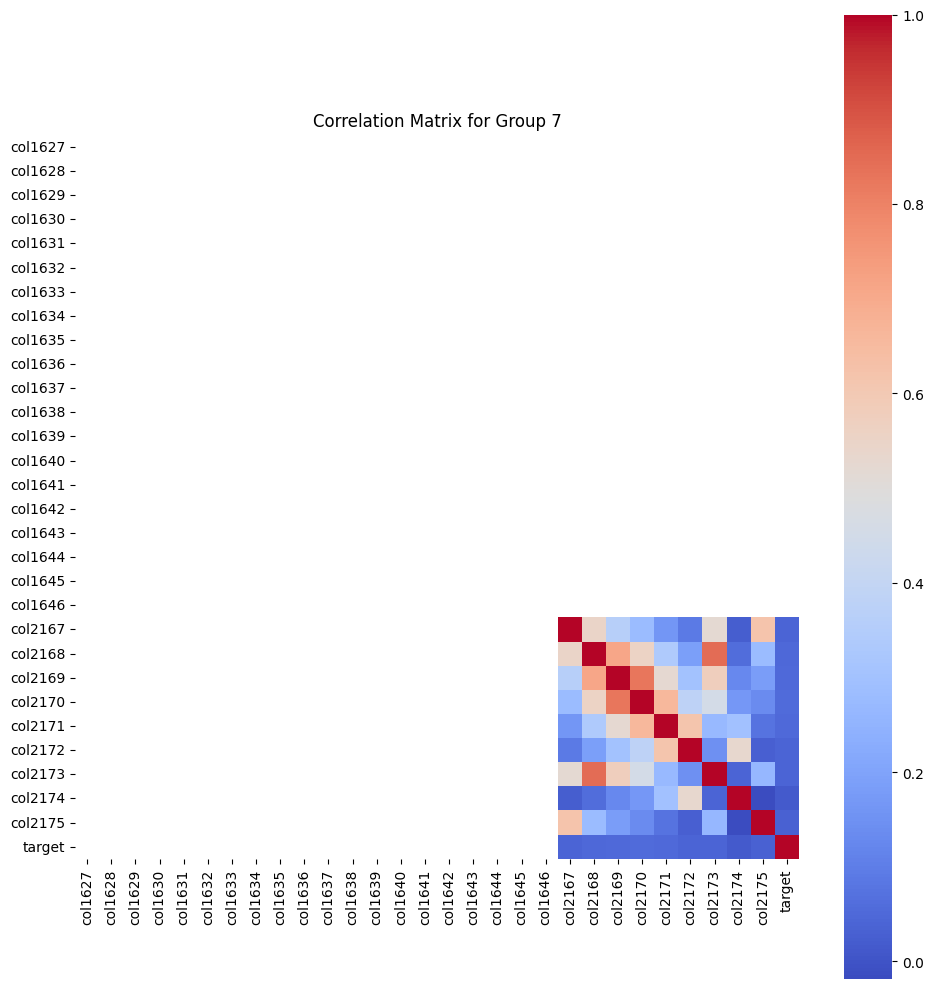

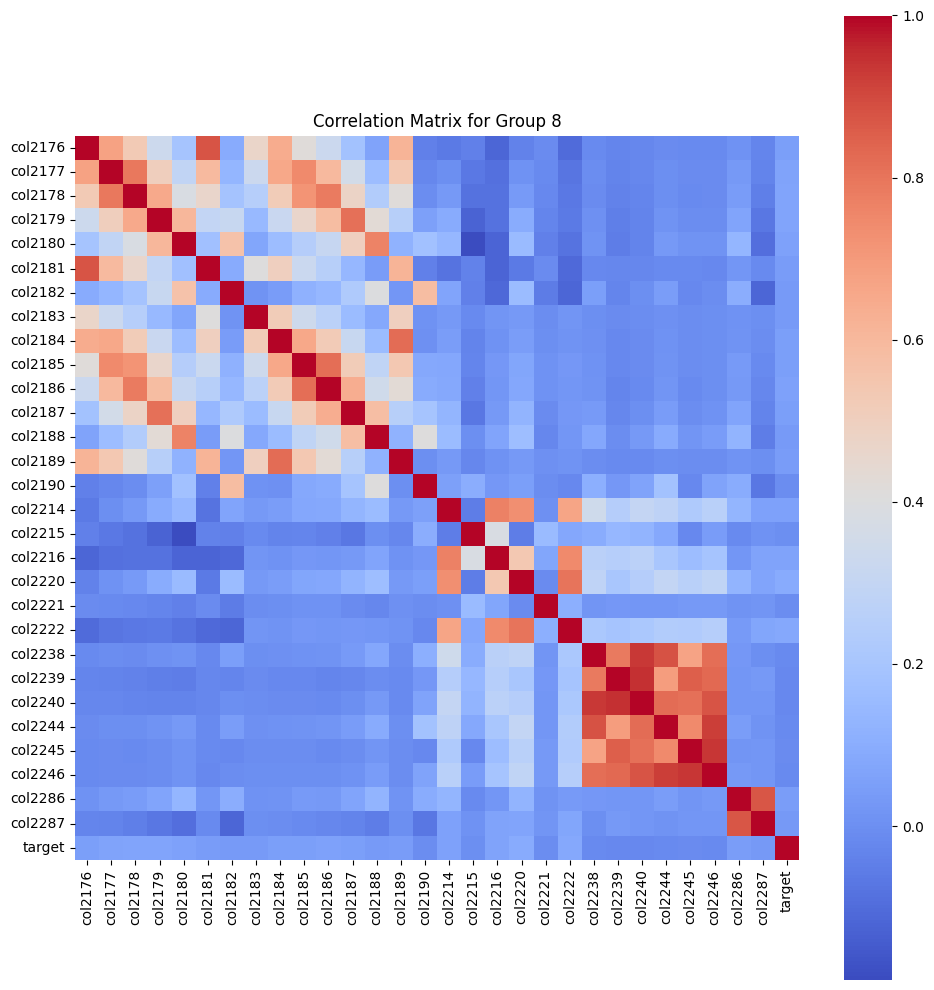

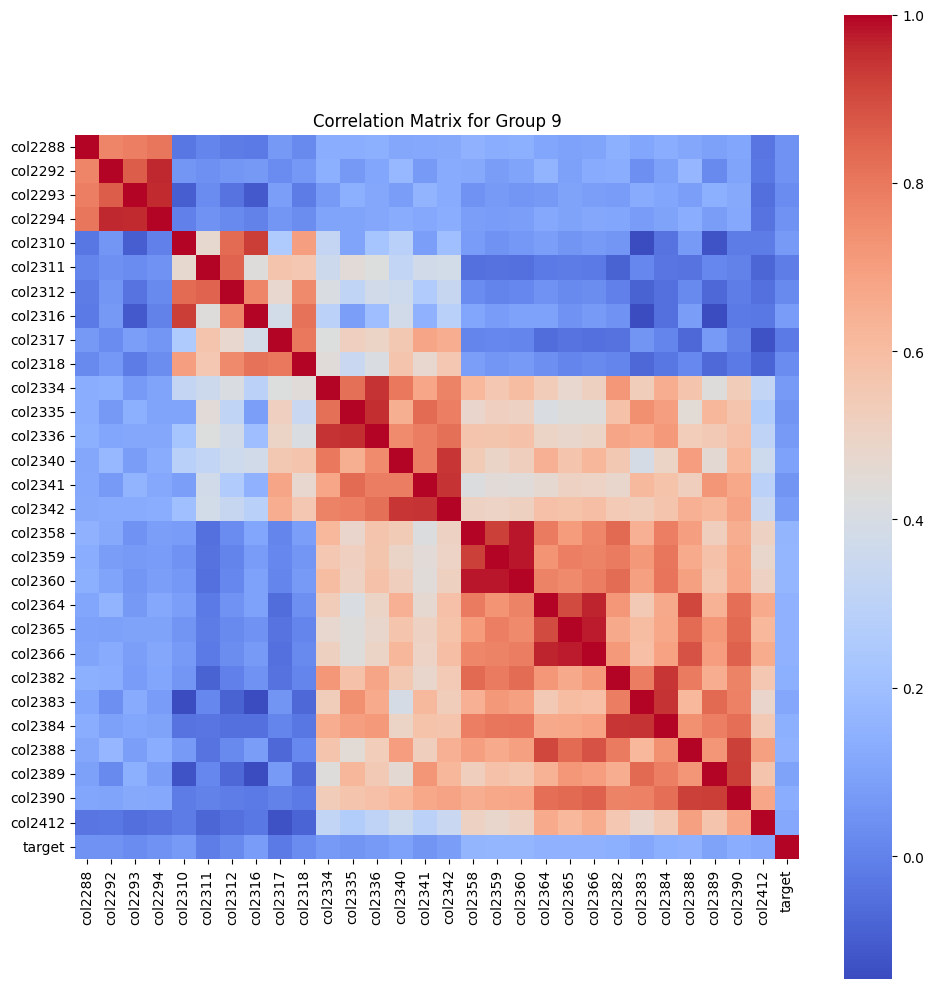

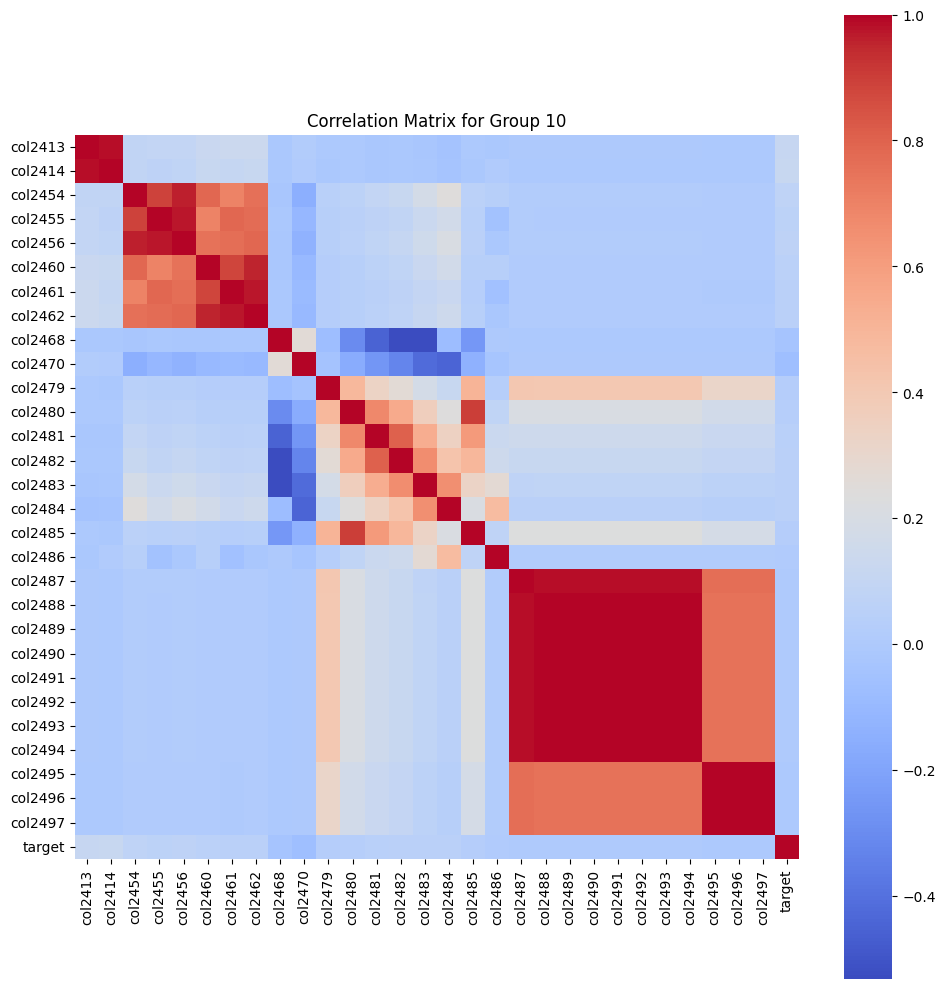

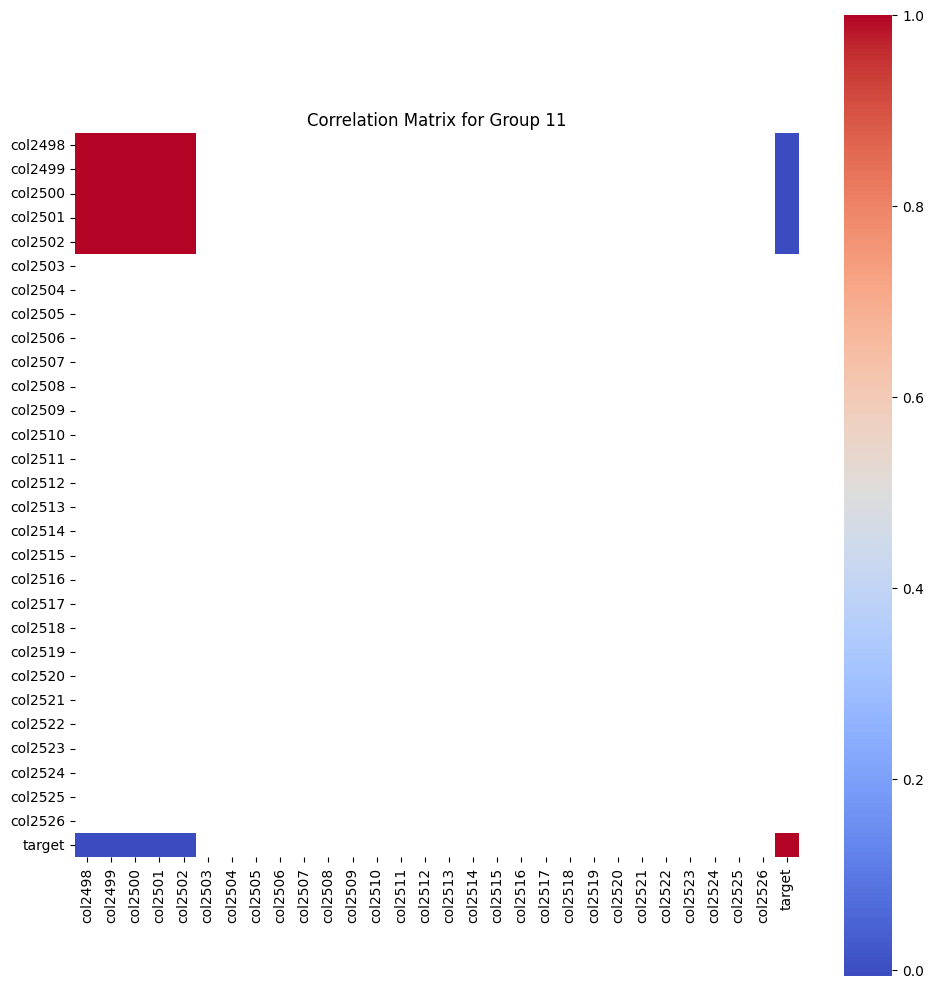

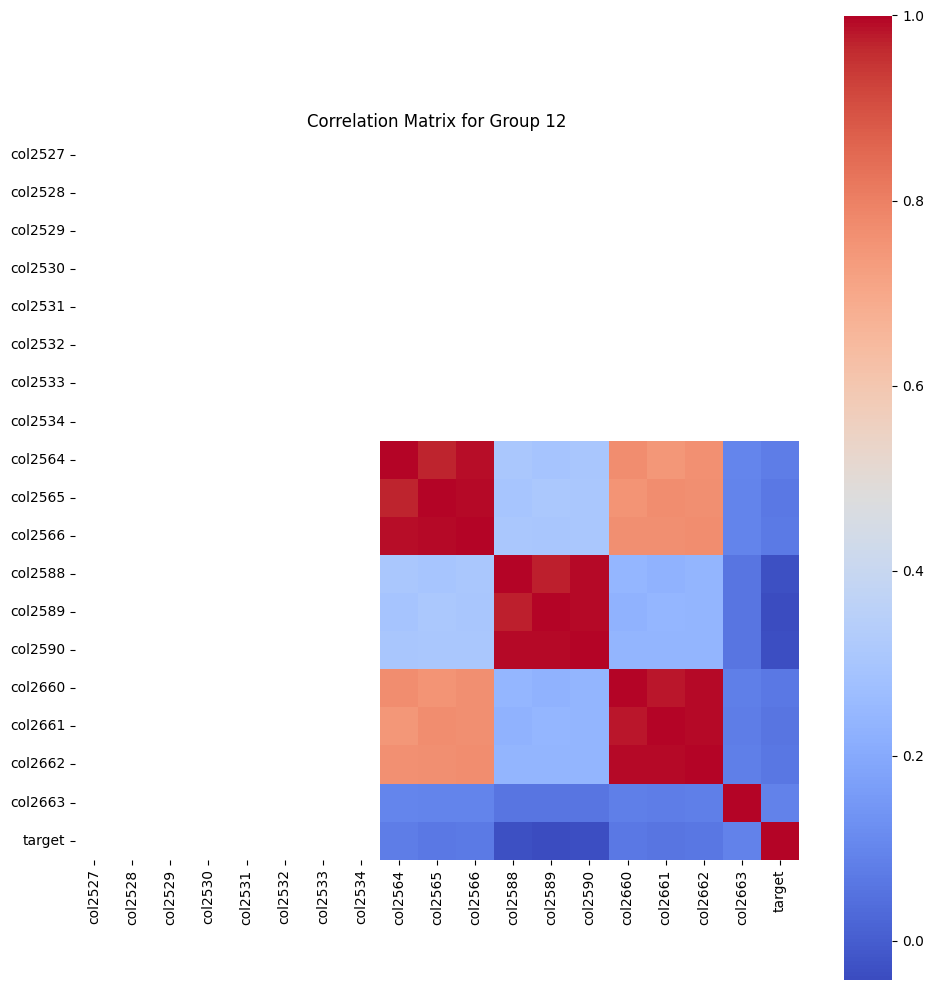

In [17]:
def plot_correlation_matrices(df, target, num_groups=12):
    #  Оставляем только числовые столбцы
    numeric_df = df.select_dtypes(include=['number'])

    # Проверяем, что целевая переменная тоже числовая
    if target not in numeric_df.columns:
        raise ValueError(f"Целевая переменная '{target}' должна быть числовой.")

    # Получаем все числовые столбцы, кроме целевой переменной
    feature_columns = [col for col in numeric_df.columns if col != target]

    # Разделяем столбцы на группы (иначе не вместиться)
    group_size = len(feature_columns) // num_groups + 1
    groups = [feature_columns[i:i + group_size] for i in range(0, len(feature_columns), group_size)]

    #  Строим матрицы корреляции для каждой группы
    for i, group in enumerate(groups):
        # Выбираем текущую группу и целевую переменную
        subset = numeric_df[group + [target]]

        # Вычисляем корреляцию
        corr_matrix = subset.corr()

        # Строим heatmap
        plt.figure(figsize=(10, 10))
        sns.heatmap(corr_matrix, annot=False, square=True, cmap="coolwarm", cbar=True)
        plt.title(f'Correlation Matrix for Group {i + 1}')
        plt.tight_layout()
        plt.show()

# Пример вызова
plot_correlation_matrices(df, target='target', num_groups=12)


In [18]:
df['col1479'].value_counts()

,count
col1479,
0.0,14320


Многие колонки хранят только 1 значение как col1479 стоит их удалить

In [19]:
# Указываем диапазоны
ranges = [
    range(1479, 1487),
    [1519],
    range(1527, 1647),
    range(2503, 2535)
]

# Создаем регулярное выражение для поиска колонок
import re
pattern = re.compile(r"^col(147[9]|148[0-6]|1519|152[7-9]|15[3-9][0-9]|16[0-4][0-9]|1646|250[3-9]|25[1-2][0-9]|253[0-4])$")

# Находим названия колонок, которые соответствуют шаблону
columns_to_drop = [col for col in df.columns if pattern.match(col)]

# Удаляем найденные колонки
df.drop(columns_to_drop, axis=1, inplace=True)
df.head()

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2564,col2565,col2566,col2588,col2589,col2590,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,6412289.0,6298885.0,6354174.0,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.256261
1,2022-11-01,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0,...,5903704.0,5903704.0,5903704.0,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,0,0.0,0.0,0.0,0.0,1.0,1.0,...,6412289.0,6298885.0,6354174.0,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.256261
3,2022-09-01,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,6412289.0,6298885.0,6354174.0,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.258682
4,2022-08-01,8,0,0,0.0,0.0,0.0,0.0,0.0,4.0,...,6412289.0,6298885.0,6354174.0,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.254164


In [20]:
# def plot_correlation_matrices(df, target, num_groups=12):
#     #  Оставляем только числовые столбцы
#     numeric_df = df.select_dtypes(include=['number'])

#     # Проверяем, что целевая переменная тоже числовая
#     if target not in numeric_df.columns:
#         raise ValueError(f"Целевая переменная '{target}' должна быть числовой.")

#     # Получаем все числовые столбцы, кроме целевой переменной
#     feature_columns = [col for col in numeric_df.columns if col != target]

#     # Разделяем столбцы на группы (иначе не вместиться)
#     group_size = len(feature_columns) // num_groups
#     groups = [feature_columns[i:i + group_size] for i in range(0, len(feature_columns), group_size)]

#     # Строим матрицы корреляции для каждой группы
#     for i, group in enumerate(groups):
#         # Выбираем текущую группу и целевую переменную
#         subset = numeric_df[group + [target]]

#         # Вычисляем корреляцию
#         corr_matrix = subset.corr()

#         # Строим heatmap
#         plt.figure(figsize=(10, 10))
#         sns.heatmap(corr_matrix, annot=False, square=True, cmap="coolwarm", cbar=True)
#         plt.title(f'Correlation Matrix for Group {i + 1}')
#         plt.tight_layout()
#         plt.show()


# plot_correlation_matrices(df, target='target', num_groups=1)

In [21]:
# def plot_correlation_matrices(df, target, num_groups=1):
#     #  Оставляем только числовые столбцы
#   numeric_df = df.select_dtypes(include=['number'])

#     # Проверяем, что целевая переменная тоже числовая
#   if target not in numeric_df.columns:
#       raise ValueError(f"Целевая переменная '{target}' должна быть числовой.")

#     # Получаем все числовые столбцы, кроме целевой переменной
#   feature_columns = [col for col in numeric_df.columns if col != target]

#     # Разделяем столбцы на группы (иначе не вместиться)
#   group_size = len(feature_columns) // num_groups + 1
#   groups = [feature_columns[i:i + group_size] for i in range(0, len(feature_columns), group_size)]

#     # Шаг 4: Строим матрицы корреляции для каждой группы
#   for i, group in enumerate(groups):
#         # Выбираем текущую группу и целевую переменную
#         subset = numeric_df[group + [target]]

#         # Вычисляем корреляцию
#         corr_matrix = subset.corr()

#         # Строим heatmap
#         plt.figure(figsize=(10, 10))
#         sns.heatmap(corr_matrix, annot=False, square=True, cmap="coolwarm", cbar=True)
#         plt.title(f'Correlation Matrix for Group {i + 1}')
#         plt.tight_layout()
#         plt.show()

# # Пример вызова
# plot_correlation_matrices(df, target='target', num_groups=1)

теперь матрица заполнена и колонок только с 0 нет но есть похожие колонки





In [22]:
df['col1466'].value_counts()

,count
col1466,
0.0,11236
1.0,2205
2.0,628
3.0,168
4.0,50
5.0,21
6.0,5
8.0,2
7.0,2


In [23]:
df['col1458'].value_counts()

,count
col1458,
0.0,11236
1.0,2204
2.0,629
3.0,168
4.0,48
5.0,21
6.0,7
8.0,2
7.0,2


In [24]:
df.shape #проверка

(14320, 178)

In [25]:
def remove_constant_columns(df):
    # Проверяем, есть ли в столбце только одна уникальная строка
    constant_columns = [col for col in df.columns if df[col].nunique() == 1]

    # Удаляем эти столбцы
    return df.drop(columns=constant_columns)


In [26]:
df.shape

(14320, 178)

In [27]:
df  = remove_constant_columns(df)
df.shape

(14320, 178)

In [28]:
# Сортируем DataFrame по столбцам 'client_id' и 'report_date'
df = df.sort_values(['client_id', 'report_date'])

# Создаем новый столбец 'prev_target', который содержит значение 'target' из предыдущей строки в группе 'client_id'
df['prev_target'] = df.groupby('client_id')['target'].shift(1)

# Создаем новый столбец 'record_count', который содержит номер записи для каждого 'client_id'
# Нумерация начинается с 1
df['record_count'] = df.groupby('client_id').cumcount() + 1

# Преобразуем столбец 'report_date' в формат datetime
df['report_date'] = pd.to_datetime(df['report_date'])

# Вычисляем разницу в днях между текущей и предыдущей датой отчета для каждого клиента
df['last_interaction'] = df['report_date'].diff().dt.days

# Заполняем все пропущенные значения в DataFrame нулями
df = df.fillna(0)

In [29]:
df[df['client_id' ] == 51]

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2588,col2589,col2590,col2660,col2661,col2662,col2663,prev_target,record_count,last_interaction
6191,2021-12-01,51,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.257217,0.0,1,-427.0
2676,2022-03-01,51,0,0,0.0,0.0,1.0,1.0,1.0,1.0,...,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.257217,0.0,2,90.0
1482,2022-04-01,51,0,0,0.0,0.0,0.0,1.0,1.0,1.0,...,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.257217,0.0,3,31.0
39,2022-08-01,51,1,0,0.0,0.0,1.0,1.0,1.0,2.0,...,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.257217,0.0,4,122.0
1779,2022-09-01,51,1,0,0.0,0.0,0.0,1.0,1.0,2.0,...,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.257217,1.0,5,31.0
12729,2022-10-01,51,1,0,0.0,0.0,0.0,1.0,1.0,2.0,...,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.257217,1.0,6,30.0


In [30]:
# # Оставляем только числовые колонки
# numeric_df = df.select_dtypes(include=['number'])

# # Определяем колонку таргет (обновите имя колонки target, если необходимо)
# target_column = 'target'

# # Вычисляем матрицу корреляции
# correlation_matrix = numeric_df.corr()

# # Находим корреляции с таргетом
# target_correlations = correlation_matrix[target_column]

# # Инициализируем множество для удаления колонок
# to_drop = set()

# # Ищем сильно коррелирующие пары колонок
# for i in range(correlation_matrix.shape[0]):
#     for j in range(i + 1, correlation_matrix.shape[0]):
#         col1 = correlation_matrix.columns[i]
#         col2 = correlation_matrix.columns[j]

#         # Проверяем корреляцию между колонками
#         if correlation_matrix.iloc[i, j] >= 0.9:
#             # Удаляем колонку с меньшей корреляцией к таргету
#             if abs(target_correlations[col1]) >= abs(target_correlations[col2]):
#                 to_drop.add(col2)
#             else:
#                 to_drop.add(col1)

# # Удаляем выбранные колонки из числового DataFrame
# numeric_df = numeric_df.drop(columns=to_drop)

# # Обновляем оригинальный DataFrame, исключая удалённые колонки
# df = df.drop(columns=to_drop)

In [31]:
from sklearn import preprocessing
#Напишем функцию, которая принимает на вход наши данные, кодирует числовыми значениями категориальные признаки
#и возвращает обновленный данные и сами кодировщики
def number_encode_features(init_df):
    result = init_df.copy() #копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() #для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) #применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) #Теперь encoded data содержит закодированные категориальные признаки
encoded_data.head() #проверяем

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2588,col2589,col2590,col2660,col2661,col2662,col2663,prev_target,record_count,last_interaction
12132,2021-10-01,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.256261,0.0,1,0.0
4718,2021-12-01,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.256261,0.0,2,61.0
6471,2022-06-01,1,0,0,0.0,0.0,0.0,0.0,1.0,1.0,...,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.256261,0.0,3,182.0
0,2022-11-01,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,270.0,267.0,269.0,6942170.0,6813845.0,6876651.0,0.256261,0.0,4,153.0
13554,2022-06-01,2,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,240.0,240.0,240.0,4941670.0,4941670.0,4941670.0,0.256919,0.0,1,-153.0


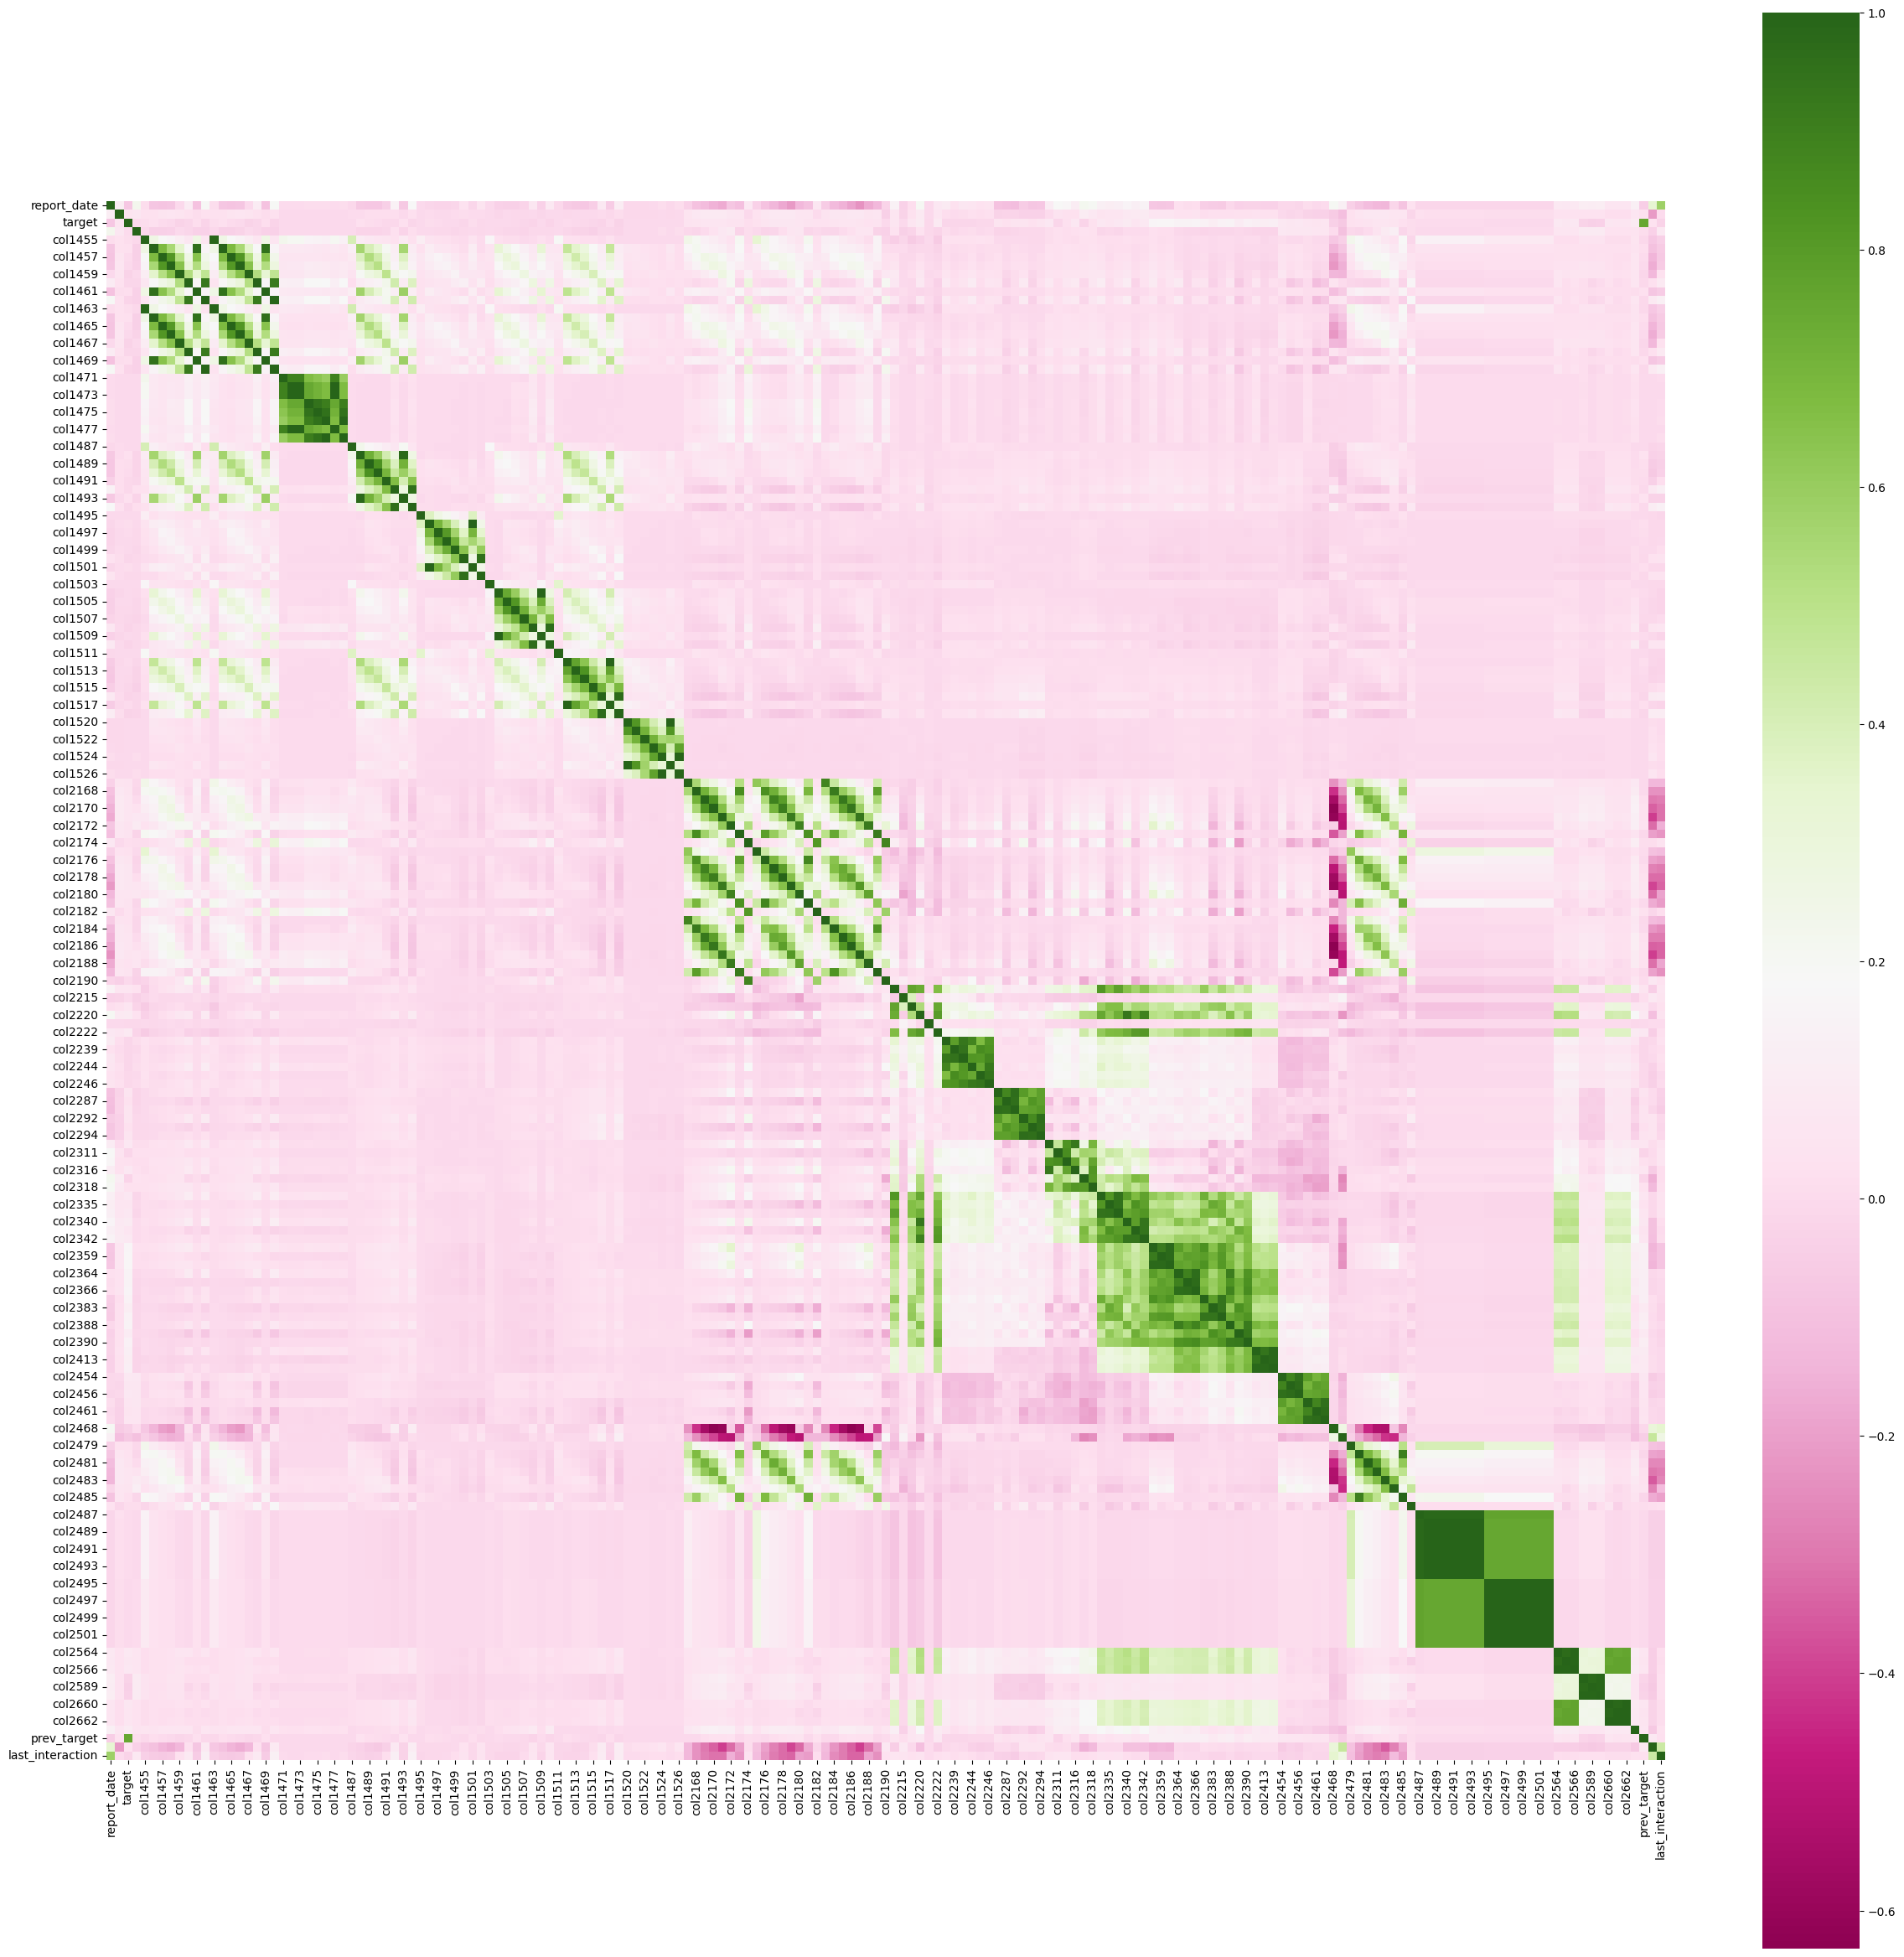

In [32]:
plt.subplots(figsize=(30,30))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), annot=False, square=True, cbar=True, cmap="PiYG")
plt.show()

мы удалили колнки с 1 только значением и те что сильно друг на друга похожи



 Отсутствие высокой корреляции:

Ни один из признаков не имеет ярко выраженной высокой корреляции (близкой к 1 или -1) с target. Это указывает на то, что линейной зависимости между этими признаками и целевой переменной нет.


In [33]:
df.shape #осталось 184 колонки

(14320, 181)

In [34]:
client_ids = df['client_id'].unique()


train_ids, test_ids = train_test_split(client_ids, test_size=0.25, random_state=42)


train_data = df[df['client_id'].isin(train_ids)]
test_data = df[df['client_id'].isin(test_ids)]

print(train_data['client_id'].nunique())
print(test_data['client_id'].nunique())
print("Training dataset size:", len(train_data))
print("Testing dataset size:", len(test_data))

3612
1205
Training dataset size: 10741
Testing dataset size: 3579


In [35]:
train_data[train_data['client_id' ] == 41] # разделяем  выборку
test_data[test_data['client_id' ] == 41]

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2588,col2589,col2590,col2660,col2661,col2662,col2663,prev_target,record_count,last_interaction


In [36]:
X_train = train_data.drop(['target' , 'report_date' ] , axis = 1)
y_train = train_data['target']

X_test = test_data.drop(['target' ,  'report_date'], axis = 1)
y_test = test_data['target']

In [37]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Распределение времени взаимодействия
fig2 = px.histogram(
    df,
    x='last_interaction',
    title='Распределение времени с последнего взаимодействия',
    labels={'last_interaction': 'Дни с последнего взаимодействия'},
    nbins=50
)
fig2.update_traces(marker_color='blue', opacity=0.7)
fig2.show()

In [38]:
# Распределение таргета
fig1 = px.histogram(
    df,
    x='target',
    title='Распределение таргета',
    labels={'last_interaction': 'Дни с последнего взаимодействия'},
    nbins=50
)
fig1.update_traces(marker_color='pink', opacity=0.5)
fig1.show()



In [39]:

# Пример визуализации №4: Среднее значение record_count по клиентам
avg_record_count = df.groupby('client_id')['record_count'].mean().reset_index()
fig4 = px.bar(
    avg_record_count,
    x='client_id',
    y='record_count',
    title='Среднее значение количество записей по клиентам',
    labels={'record_count': 'Среднее значение record_count', 'client_id': 'ID клиента'}
)
fig4.update_traces(marker_color='black')
fig4.show()

Видно дисбаланс в таргете, самое популярное время возвращения клиента 0-100 дней и сред знач записей у клиента - 2

In [40]:
def plot_roc_auc(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_pred)
    roc_auc = roc_auc_score(y_true=y_true, y_score=y_pred)

    plt.figure(figsize=(10, 3))
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.4f)' % roc_auc, alpha=0.5)

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver operating characteristic', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.show()
    return roc_auc #функция  для отрисовки

In [41]:
from sklearn.utils.class_weight import compute_class_weight
# Расчет дисбалнса классов
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))
class_weights

{0: 0.51619569396386, 1: 15.93620178041543}

In [42]:
model = CatBoostClassifier(eval_metric = "AUC", class_weights = class_weights
                         )
model.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True, verbose=False) # обучаем  бустнг

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

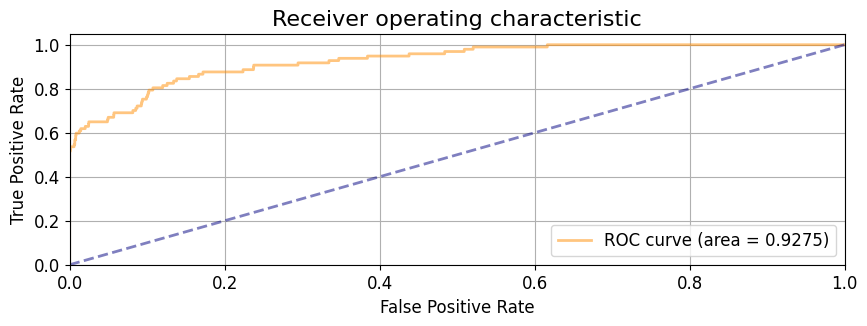

In [43]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, classification_report, precision_score, recall_score, f1_score
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)
# результаты  на  валидации
roc_auc = plot_roc_auc(y_true=y_test, y_pred=y_pred_proba)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3482
           1       0.34      0.65      0.45        97

    accuracy                           0.96      3579
   macro avg       0.67      0.81      0.71      3579
weighted avg       0.97      0.96      0.96      3579



# **Обучение и тест данных**

In [45]:
X_val_df = pd.read_csv('valid.csv' ) #загрузка тестовых данных

<ipython-input-45-c7ce0709752c>:1: DtypeWarning:

Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,91,95,96,97,99,131,132,133,135,136,140,141,142,144,145,146,147,148,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,207,208,211,212,213,215,216,239,240,241,243,244,245,459,467,563,567,571,575,579,580,583,611,612,795,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1047,1055,1063,1064,1071,1072,1073,1074,1175,1176,1177,1178,1179,1180,1181,1182,1277,1278,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1653,1654,1656,2193,2194,2195,2196,2199) have mixed types. Specify dtype option on import or set low_memory=False.



все тестовые данные обробатываем как трейн


In [46]:

for cat_col in cat_columns:
    X_val_df[cat_col] = X_val_df[cat_col].fillna("unknown")

# Обработка пропусков в числовых столбцах (замена на среднее значение)
numeric_columns = X_val_df.select_dtypes(include=['float']).columns
for num_col in numeric_columns:
    # Вычисляем среднее значение, игнорируя NaN
    mean_value = X_val_df[num_col].mean()

    # Проверяем, что среднее не равно NaN
    if pd.notna(mean_value):
        X_val_df[num_col] = X_val_df[num_col].fillna(mean_value)
    else:
        # Если среднее равно NaN, заменим пропуски на 0 (или другое значение по выбору)
        X_val_df[num_col] = X_val_df[num_col].fillna(0)

# Выводим результат
X_val_df


,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,0.0,0.0,0.0,0.0,0.0,0.0,3689700.0,...,4.941670e+06,4.941670e+06,4.941670e+06,7.730154e+06,7.730154e+06,7.730154e+06,4.941670e+06,4.941670e+06,4.941670e+06,0.256919
1,2023-05-01,4,0,0.0,0.0,0.0,0.0,0.0,0.0,3689700.0,...,1.178950e+07,1.178950e+07,1.178950e+07,7.730154e+06,7.730154e+06,7.730154e+06,1.178950e+07,1.178950e+07,1.178950e+07,0.267221
2,2023-05-01,9,0,0.0,0.0,0.0,0.0,0.0,0.0,3689700.0,...,7.000000e+06,7.000000e+06,7.000000e+06,7.730154e+06,7.730154e+06,7.730154e+06,7.000000e+06,7.000000e+06,7.000000e+06,0.257217
3,2023-03-01,12,0,0.0,0.0,0.0,0.0,0.0,0.0,3689700.0,...,8.448288e+06,8.333270e+06,8.391739e+06,7.730154e+06,7.730154e+06,7.730154e+06,7.513674e+06,7.357729e+06,7.435937e+06,0.256261
4,2023-03-01,14,0,0.0,0.0,0.0,0.0,0.0,0.0,3689700.0,...,8.448288e+06,8.333270e+06,8.391739e+06,7.730154e+06,7.730154e+06,7.730154e+06,1.039100e+07,1.039100e+07,1.039100e+07,0.257348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,2023-04-01,4366,0,0.0,0.0,0.0,0.0,0.0,0.0,3689700.0,...,8.448288e+06,8.333270e+06,8.391739e+06,7.730154e+06,7.730154e+06,7.730154e+06,3.500000e+06,3.500000e+06,3.500000e+06,0.256261
3638,2023-04-01,8298,0,0.0,0.0,0.0,0.0,0.0,0.0,3689700.0,...,8.448288e+06,8.333270e+06,8.391739e+06,7.730154e+06,7.730154e+06,7.730154e+06,7.513674e+06,7.357729e+06,7.435937e+06,0.256261
3639,2023-03-01,835,0,0.0,0.0,0.0,0.0,0.0,0.0,3689700.0,...,8.448288e+06,8.333270e+06,8.391739e+06,7.730154e+06,7.730154e+06,7.730154e+06,7.513674e+06,7.357729e+06,7.435937e+06,0.256919
3640,2023-03-01,8300,0,0.0,0.0,0.0,0.0,0.0,0.0,3689700.0,...,8.448288e+06,8.333270e+06,8.391739e+06,7.730154e+06,7.730154e+06,7.730154e+06,7.513674e+06,7.357729e+06,7.435937e+06,0.257217


In [47]:
X_val_df.shape #2666 колонок

(3642, 2666)

In [48]:
# X_test = test_data.drop(['target' ,  'report_date'], axis = 1)
# y_test = test_data['target']

In [49]:
for cat_col in cat_columns:
    X_val_df[cat_col] =X_val_df[cat_col].fillna("unknown")

# Заполняем пропущенные значения в числовых переменных
for num_col in numeric_columns:
    mean_value = X_val_df[num_col].mean()
    X_val_df[num_col] = X_val_df[num_col].fillna(int(mean_value))

X_val_df = X_val_df.apply(lambda x:x.fillna(0))

In [50]:
X_val_df = X_val_df.sort_values(['client_id', 'report_date'])
X_val_df['prev_target'] = X_val_df.groupby('client_id')['target'].shift(1)
X_val_df['record_count'] = X_val_df.groupby('client_id').cumcount() + 1
X_val_df['report_date'] = pd.to_datetime(X_val_df['report_date'])
X_val_df['last_interaction'] = X_val_df['report_date'].diff().dt.days
X_val_df =X_val_df.fillna(0)
y_val = X_val_df['target']

In [51]:
X_val_df.head() #проверка

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2657,col2658,col2659,col2660,col2661,col2662,col2663,prev_target,record_count,last_interaction
2326,2023-03-01,2,0,0.0,0.0,0.0,0.0,0.0,0.0,3689700.0,...,7.730154e+06,7.730154e+06,7.730154e+06,4941670.0,4941670.0,4941670.0,0.256919,0.0,1,0.0
0,2023-04-01,2,0,0.0,0.0,0.0,0.0,0.0,0.0,3689700.0,...,7.730154e+06,7.730154e+06,7.730154e+06,4941670.0,4941670.0,4941670.0,0.256919,0.0,2,31.0
506,2023-04-01,4,0,0.0,0.0,0.0,0.0,0.0,0.0,3689700.0,...,1.178950e+07,1.178950e+07,1.178950e+07,11789500.0,11789500.0,11789500.0,0.267221,0.0,1,0.0
1,2023-05-01,4,0,0.0,0.0,0.0,0.0,0.0,0.0,3689700.0,...,7.730154e+06,7.730154e+06,7.730154e+06,11789500.0,11789500.0,11789500.0,0.267221,0.0,2,30.0
428,2023-03-01,5,0,0.0,0.0,0.0,0.0,0.0,0.0,3689700.0,...,7.730154e+06,7.730154e+06,7.730154e+06,7616803.0,7616803.0,7616803.0,0.256261,0.0,1,-61.0


In [52]:
X_train = df.drop(['target' , 'report_date' ] , axis = 1)
y_train = df['target']

X_test = X_val_df[X_train.columns] # теперь все колонки X_train есть в X_test
y_test = X_val_df['target']

In [53]:
model = CatBoostClassifier(eval_metric = "AUC", class_weights = class_weights
                         )
model.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True, verbose=False) # обучаем  бустнг

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

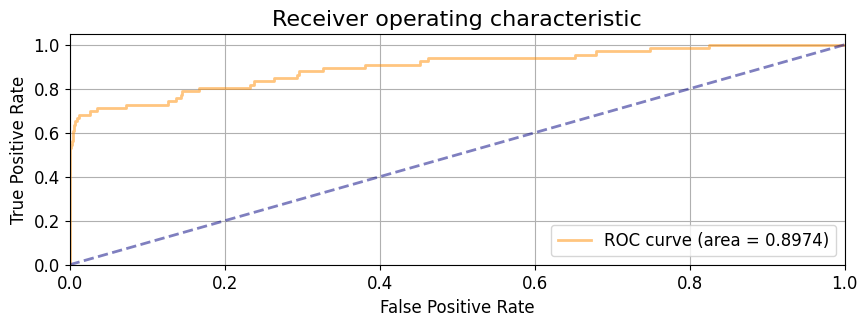

In [54]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, classification_report, precision_score, recall_score, f1_score
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)
# результаты  на  валидации
roc_auc = plot_roc_auc(y_true=y_test, y_pred=y_pred_proba)

In [55]:
print(classification_report(y_test, y_pred)) #маленькте знач у 1 и это нормально тк сильный дисбаланс

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3576
           1       0.70      0.58      0.63        66

    accuracy                           0.99      3642
   macro avg       0.85      0.79      0.81      3642
weighted avg       0.99      0.99      0.99      3642



In [56]:
imp = model.get_feature_importance(prettified=True)
imp.describe()


,Importances
count,179.000000
mean,0.558659
std,2.352403
min,0.000000
25%,0.000633
50%,0.109720
75%,0.566948
max,30.290510


In [57]:
imp = imp[imp['Importances'] > 0.43] #берем самые влияющие колоноки

In [58]:
data = df[imp['Feature Id']]


data['client_id']  = df['client_id']
data['target']  =  df['target']

<ipython-input-58-511cf3846359>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-58-511cf3846359>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



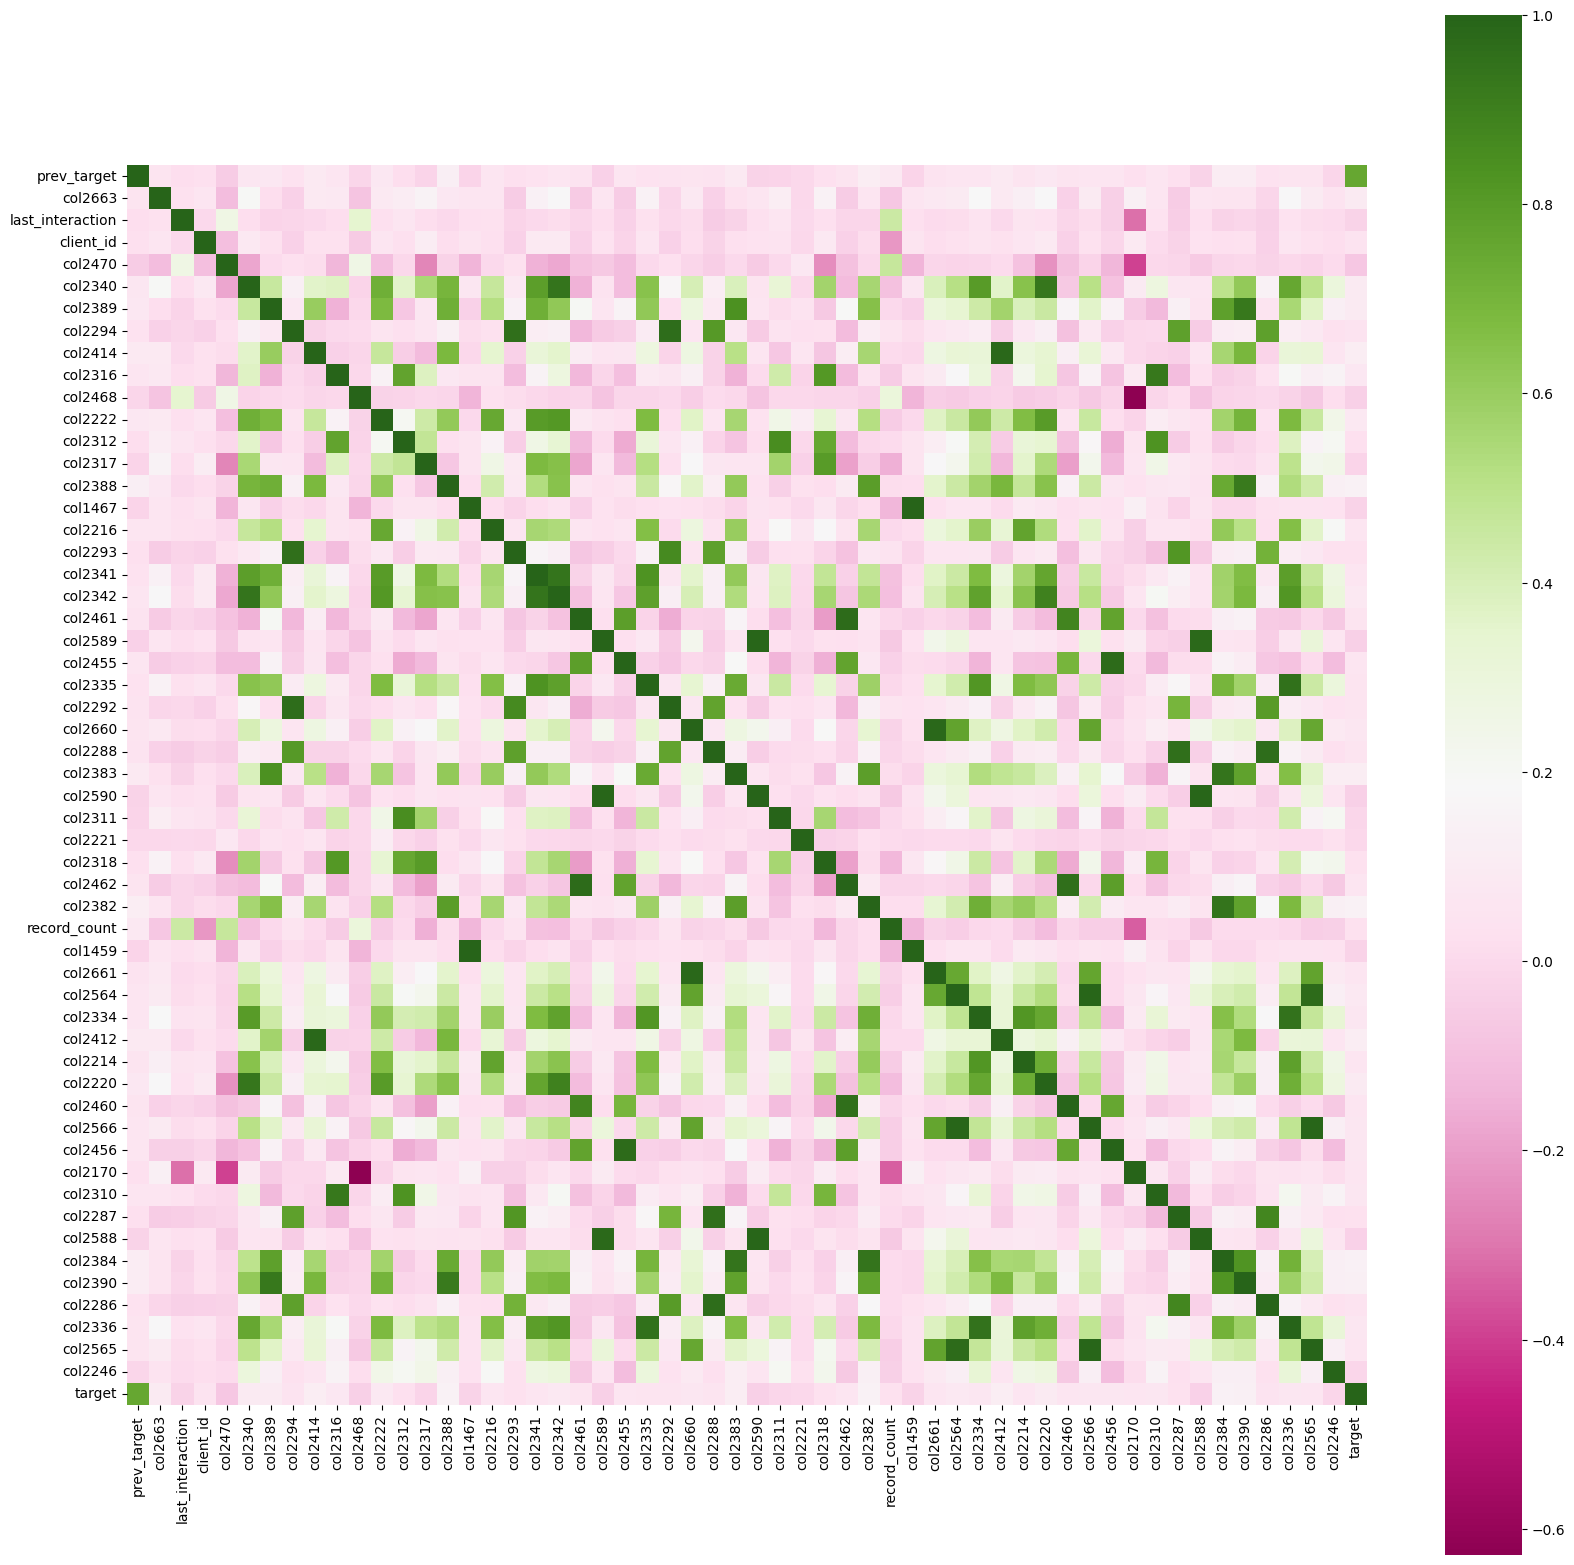

In [59]:
plt.subplots(figsize=(20,20))
encoded_data, encoders = number_encode_features(data)
sns.heatmap(encoded_data.corr(), annot=False, square=True, cbar=True, cmap="PiYG")
plt.show()

In [60]:
# Функция для построения ROC-кривой
def plot_roc_auc(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc_score = roc_auc_score(y_true, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    return auc_score


# **Результаты**

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

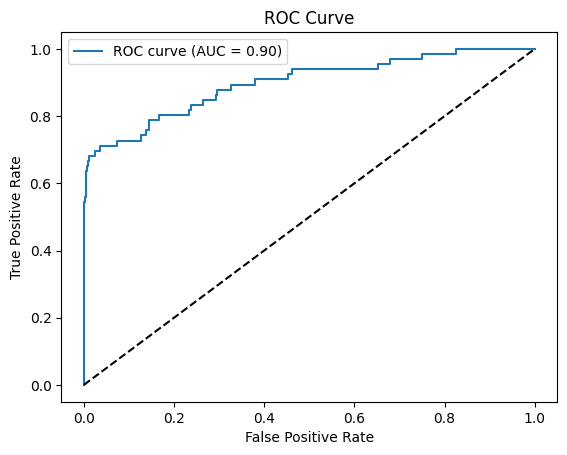

CatBoostClassifier:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3576
           1       0.70      0.58      0.63        66

    accuracy                           0.99      3642
   macro avg       0.85      0.79      0.81      3642
weighted avg       0.99      0.99      0.99      3642



In [61]:
# CatBoostClassifier Вероника
catboost_model = CatBoostClassifier(eval_metric="AUC", class_weights=class_weights)
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True, verbose=False)

catboost_pred_proba = catboost_model.predict_proba(X_test)[:, 1]
catboost_pred = catboost_model.predict(X_test)

catboost_auc = plot_roc_auc(y_true=y_test, y_pred_proba=catboost_pred_proba)
print("CatBoostClassifier:")
print(classification_report(y_test, catboost_pred))

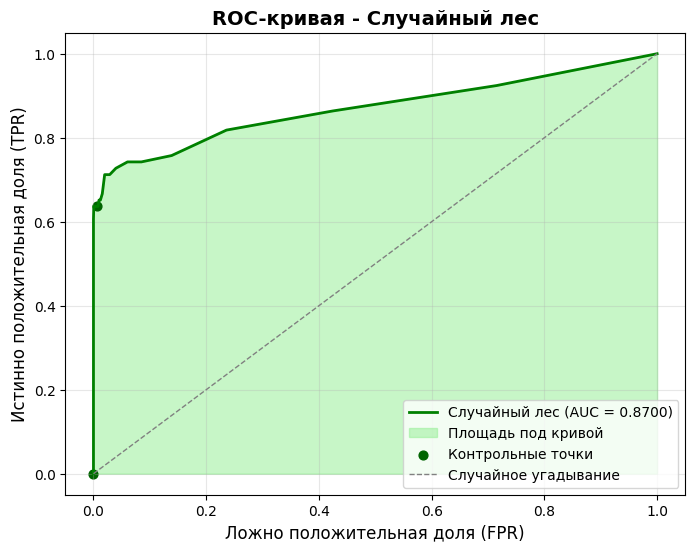

RandomForestClassifier:
AUC: 0.8700
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3576
           1       1.00      0.20      0.33        66

    accuracy                           0.99      3642
   macro avg       0.99      0.60      0.66      3642
weighted avg       0.99      0.99      0.98      3642



In [62]:
# RandomForestClassifier - Саша
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Создание и обучение модели
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42) #выбор модели
rf_model.fit(X_train, y_train) # fit обучение

# Предсказания вероятностей и классов
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1] # предсказание на тестовых данных
rf_pred = rf_model.predict(X_test)

# Вычисление AUC
rf_auc = roc_auc_score(y_test, rf_pred_proba) # смотрим результаты по метрике roc_auc

# Построение необычной ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="green", lw=2, linestyle="-", label=f"Случайный лес (AUC = {rf_auc:.4f})")
plt.fill_between(fpr, tpr, color="lightgreen", alpha=0.5, label="Площадь под кривой")  # Заполнение под кривой
plt.scatter(fpr[::20], tpr[::20], color="darkgreen", label="Контрольные точки", s=40)  # Точки на кривой
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=1, label="Случайное угадывание")
plt.xlabel("Ложно положительная доля (FPR)", fontsize=12)
plt.ylabel("Истинно положительная доля (TPR)", fontsize=12)
plt.title("ROC-кривая - Случайный лес", fontsize=14, fontweight="bold")
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# Вывод отчета о качестве модели
print("RandomForestClassifier:")
print(f"AUC: {rf_auc:.4f}")
print(classification_report(y_test, rf_pred)) # результаты по табличке попросила Вероника


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



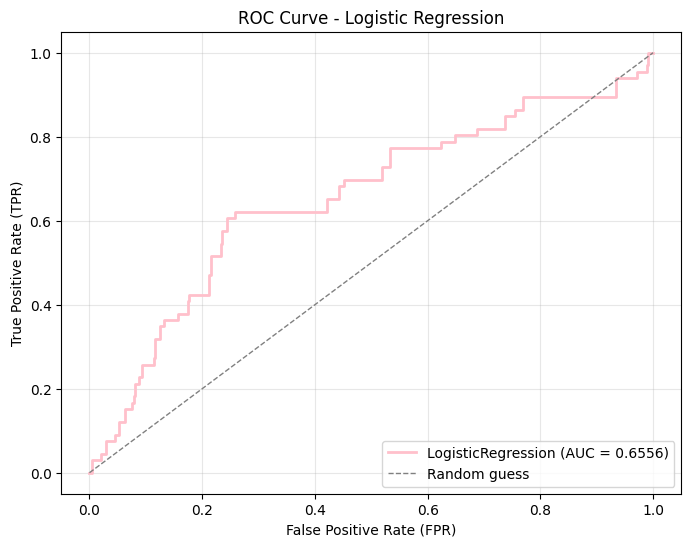

LogisticRegression:
AUC: 0.6556
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      3576
           1       0.04      0.61      0.08        66

    accuracy                           0.74      3642
   macro avg       0.52      0.68      0.46      3642
weighted avg       0.97      0.74      0.84      3642



In [63]:
# LogisticRegression - Аня
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

#обучение модели
logreg_model = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000) # мини настройки
logreg_model.fit(X_train, y_train)

# Предсказания классов
logreg_pred_proba = logreg_model.predict_proba(X_test)[:, 1]
logreg_pred = logreg_model.predict(X_test)

# Вычисление AUC
logreg_auc = roc_auc_score(y_test, logreg_pred_proba)

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, logreg_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="pink", lw=2, label=f"LogisticRegression (AUC = {logreg_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=1, label="Random guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Вывод
print("LogisticRegression:")
print(f"AUC: {logreg_auc:.4f}")
print(classification_report(y_test, logreg_pred))

